Iniciando simula√ß√£o da f√≠sica para: Cen√°rio 3: Turbul√™ncia Moderada...
Simula√ß√£o da f√≠sica conclu√≠da.
Visualizando [Gr√°fico 1]: Simula√ß√£o da F√≠sica Pura...


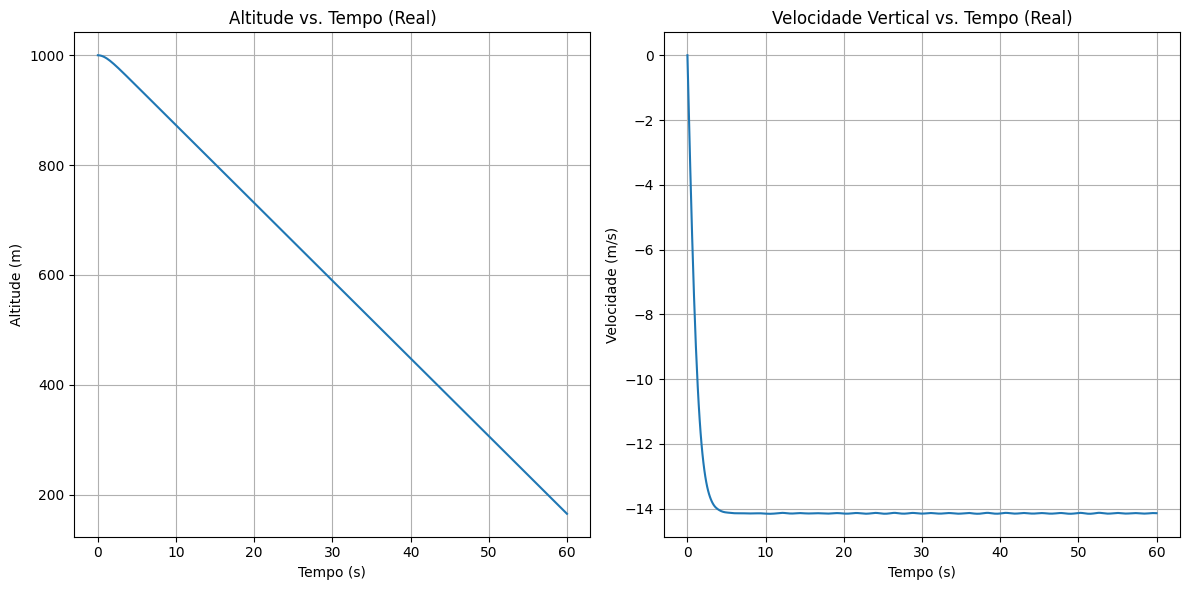

Iniciando simula√ß√£o dos sensores...
Aplicando filtro de m√©dia m√≥vel...
Simulando Pitch para: Cen√°rio 3: Turbul√™ncia Moderada...
Simula√ß√£o do sensor de Pitch conclu√≠da.
Simula√ß√£o dos sensores conclu√≠da.
Visualizando [Gr√°fico Adicional]: Sensor Altitude GNSS (Bruto)...


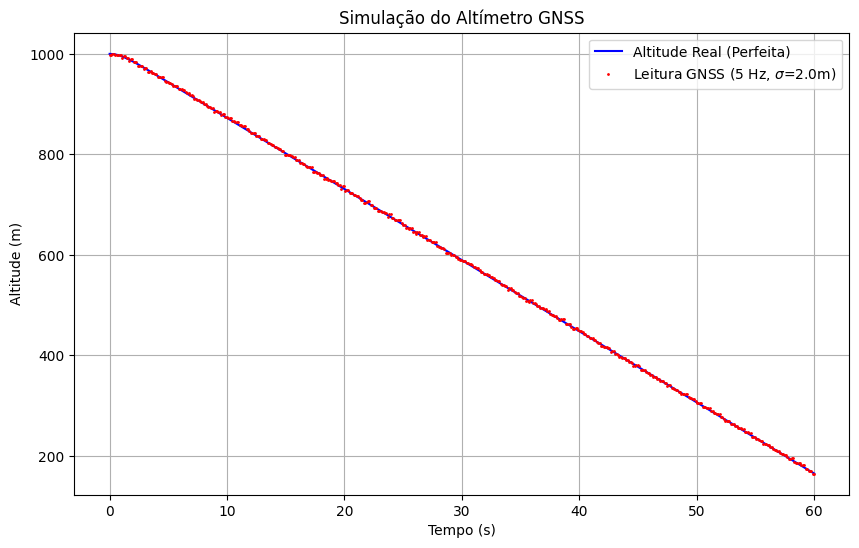

Visualizando [Gr√°fico Adicional]: Sensor Acelera√ß√£o IMU (Bruto)...


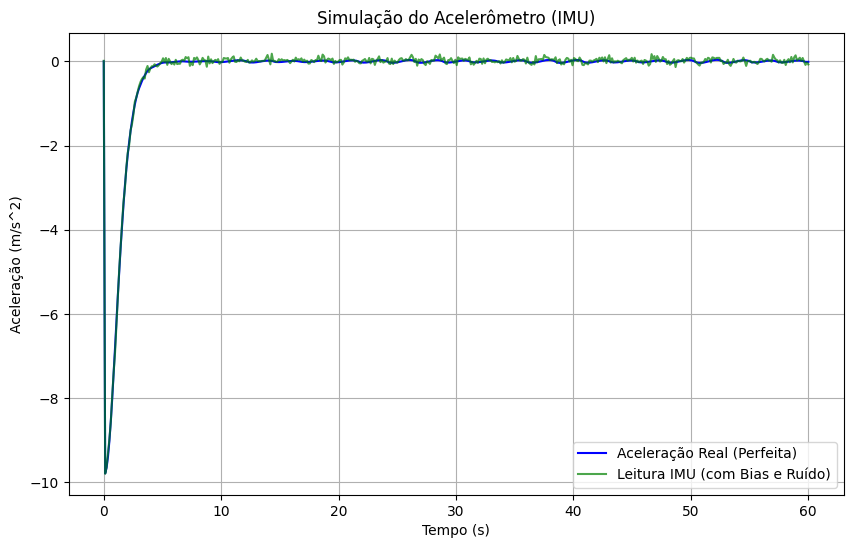

Visualizando [Gr√°fico 3]: Resultado do Filtro (M√©dia M√≥vel)...


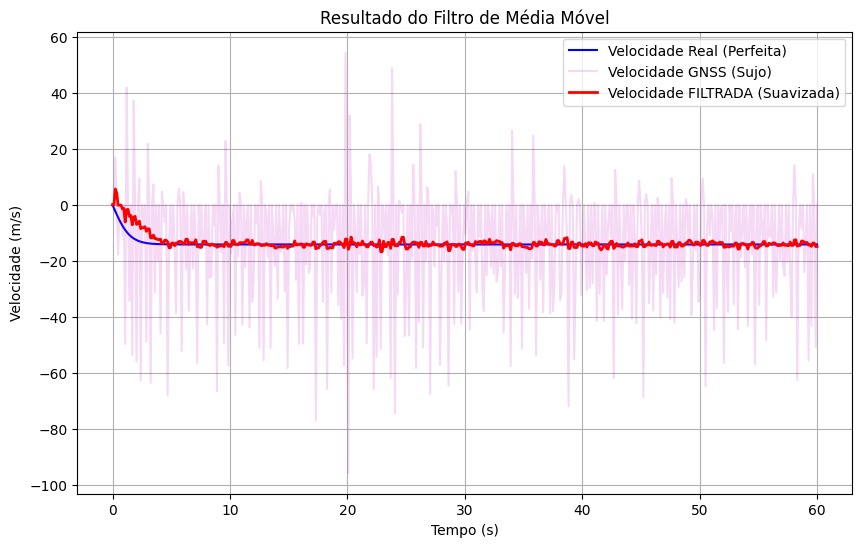

Calculando severidade (PID)...
Criando sistema de L√≥gica Fuzzy...
Definindo Base de Regras Fuzzy...
Regras criadas.
Montando o sistema de controle Fuzzy...
Sistema Fuzzy pronto.
Processando dados com a L√≥gica Fuzzy...
Processamento Fuzzy e An√°lise de Persist√™ncia conclu√≠dos.
Visualizando [Gr√°fico 4]: Decis√£o Final do Sistema Fuzzy...


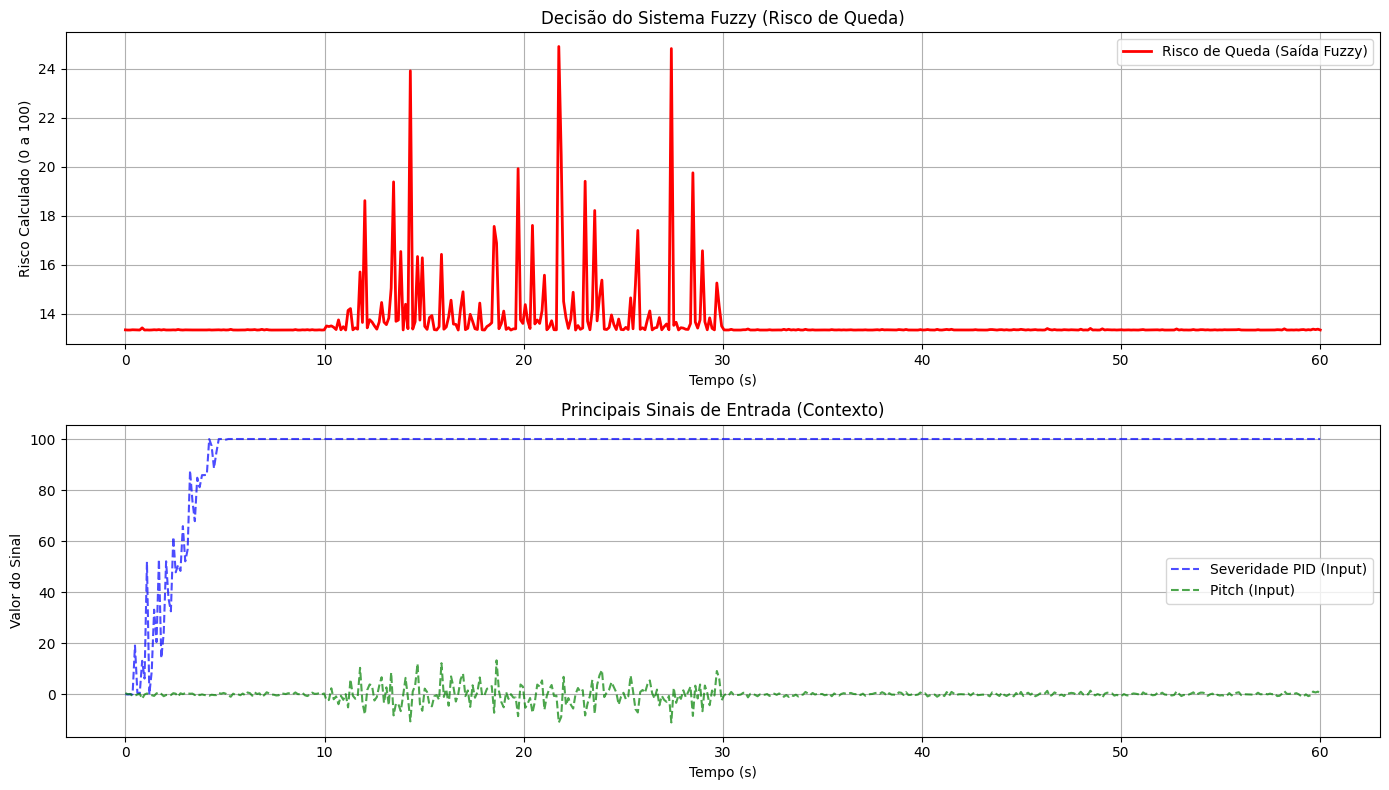


--- An√°lise da Tomada de Decis√£o (Item 3.3.2) ---

Sistema permaneceu est√°vel. Paraquedas n√£o foi acionado.
O risco m√°ximo atingido foi: 24.90

--- Simula√ß√£o Completa Conclu√≠da (Cen√°rio 3: Turbul√™ncia Moderada) ---


In [1]:
# üìÑ main.py
# O "c√©rebro" principal que orquestra toda a simula√ß√£o.

# 1. Importar os m√≥dulos que criamos
import parametros as p
import simulacao_fisica as fisica
import simulacao_sensores as sensores
import logica_decisao as cerebro
import visualizacao as plots

# 2. Executar a Simula√ß√£o da F√≠sica
(tempo, alt_real, vel_real, acel_real) = fisica.executar_simulacao(p)

# Plotar Gr√°fico 1 (O Problema)
plots.plotar_fisica_base(tempo, alt_real, vel_real)

# 3. Executar a Simula√ß√£o dos Sensores
dados_sensores = sensores.simular_sensores_e_filtros(
    p, tempo, alt_real, vel_real, acel_real
)

# --- NOVAS CHAMADAS DE PLOTAGEM ---
# Plotar Gr√°fico da Altitude GNSS (Bruto)
plots.plotar_altitude_gnss(tempo, alt_real, dados_sensores['altitude_gnss'], p)

# Plotar Gr√°fico da Acelera√ß√£o IMU (Bruto)
plots.plotar_aceleracao_imu(tempo, acel_real, dados_sensores['aceleracao_imu'])
# --- FIM DAS NOVAS CHAMADAS ---

# Plotar Gr√°fico 2 (A Justificativa)
#plots.plotar_justificativa_filtro(tempo, vel_real, dados_sensores['velocidade_estimada_gnss'])

# Plotar Gr√°fico 3 (A Solu√ß√£o)
plots.plotar_solucao_filtro(
    tempo, vel_real, 
    dados_sensores['velocidade_estimada_gnss'], 
    dados_sensores['velocidade_filtrada_gnss']
)

# 4. Executar a L√≥gica de Decis√£o (PID e Fuzzy)
# A. Calcular Severidade (PID)
severidade_pid, dt_constante = cerebro.calcular_severidade_pid(
    p, tempo, dados_sensores['velocidade_filtrada_gnss']
)

# B. Calcular Risco (Fuzzy)
risco_final, pitch_negativo_persistente = cerebro.criar_e_calcular_risco_fuzzy(
    p, tempo, dados_sensores, severidade_pid, dt_constante
)

# 5. Visualizar o Resultado Principal
# Plotar Gr√°fico 4 (A Decis√£o)
plots.plotar_decisao_final(
    tempo, 
    risco_final, 
    severidade_pid, 
    dados_sensores['pitch_sensor_giro']
)

# 6. Analisar o Disparo
cerebro.analisar_disparo(p, tempo, risco_final, pitch_negativo_persistente)

print(f"\n--- Simula√ß√£o Completa Conclu√≠da ({p.cenario_nome}) ---")